In [45]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [46]:
import os 
print(os.listdir('./input'))

['test.csv', 'data_description.txt', 'train.csv']


In [47]:
raw_data = pd.read_csv('./input/train.csv')

In [48]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
# get count of missing values 
raw_data.isnull().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [51]:
X = raw_data.drop(['Id', 'SalePrice'], axis=1)
Y = raw_data['SalePrice']

In [52]:
X.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [53]:

def train_test_split(X: DataFrame,Y: DataFrame,test_size=0.2,random_state=0):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices], Y.iloc[train_indices], Y.iloc[test_indices]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [54]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1168, 79), (292, 79), (1168,), (292,))

In [55]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
618,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,...,260,0,NaN,NaN,NaN,0,7,2007,New,Partial
870,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
92,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
817,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
302,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal


In [56]:
import torch

In [57]:
# get the non numerical columns
non_numerical_columns = X_train.select_dtypes(include=['object']).columns
print(non_numerical_columns)
X_train[non_numerical_columns].head()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
618,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,New,Partial
870,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
92,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
817,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
302,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [58]:
# convert the non numerical columns to numerical columns without using sklearn
def convert_categorical_to_numerical(X: DataFrame):
    X_copy = X.copy()
    for column in X_copy.select_dtypes(include=['object']).columns:
        X_copy[column] = X_copy[column].astype('category').cat.codes
    return X_copy

X_train = convert_categorical_to_numerical(X_train)
X_test = convert_categorical_to_numerical(X_test)

In [59]:
X_train.dtypes

MSSubClass         int64
MSZoning            int8
LotFrontage      float64
LotArea            int64
Street              int8
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType            int8
SaleCondition       int8
Length: 79, dtype: object

In [60]:
x_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32)
y_train_tensor.shape

torch.Size([1168])

In [61]:
# let's take care of the missing values
def fill_missing_values(X: torch.Tensor) -> torch.Tensor:
    # Calculate the mean of each column, ignoring NaNs
    column_means = torch.nanmean(X, dim=0)
    
    # Check if any column mean is still NaN (which would happen if all entries in that column are NaN)
    # Here you might decide to fill these NaNs with a different value, like 0 or the overall mean of other columns
    # For simplicity, let's fill with 0 (consider the appropriate value for your context)
    column_means[torch.isnan(column_means)] = 0
    
    # Expand the mean tensor to match the input dimensions and fill NaNs
    # We use broadcasting to extend column_means
    X = torch.where(torch.isnan(X), column_means, X)
    
    return X


#check for nan
print(torch.isnan(x_train_tensor).sum())
print(torch.isnan(x_test_tensor).sum())
print(torch.isnan(y_train_tensor).sum())
print(torch.isnan(y_test_tensor).sum())


x_train_tensor = fill_missing_values(x_train_tensor)
x_test_tensor = fill_missing_values(x_test_tensor)


print("after")

#check for nan
print(torch.isnan(x_train_tensor).sum())
print(torch.isnan(x_test_tensor).sum())
print(torch.isnan(y_train_tensor).sum())
print(torch.isnan(y_test_tensor).sum())



tensor(276)
tensor(72)
tensor(0)
tensor(0)
after
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [62]:
# let's normalize the data
def normalize_data(X: torch.Tensor) -> torch.Tensor:
    mean = X.mean(dim=0)
    std = X.std(dim=0) + 1e-8
    return (X - mean) / std

def denormalize_data(X: torch.Tensor, X_train: torch.Tensor) -> torch.Tensor:
    mean = X_train.mean(dim=0)
    std = X_train.std(dim=0) + 1e-8
    return X * std + mean

#check for nan
print(torch.isnan(x_train_tensor).sum())
print(torch.isnan(x_test_tensor).sum())
print(torch.isnan(y_train_tensor).sum())
print(torch.isnan(y_test_tensor).sum())

y_train_tensor_before_norm = y_train_tensor.clone()
y_test_tensor_before_norm = y_test_tensor.clone()

print("-------")

x_train_tensor = normalize_data(x_train_tensor)
x_test_tensor = normalize_data(x_test_tensor)
y_train_tensor = normalize_data(y_train_tensor)
y_test_tensor = normalize_data(y_test_tensor)

#check for nan
print(torch.isnan(x_train_tensor).sum())
print(torch.isnan(x_test_tensor).sum())
print(torch.isnan(y_train_tensor).sum())
print(torch.isnan(y_test_tensor).sum())

print(x_train_tensor.shape, x_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape)

tensor(0)
tensor(0)
tensor(0)
tensor(0)
-------
tensor(0)
tensor(0)
tensor(0)
tensor(0)
torch.Size([1168, 79]) torch.Size([292, 79]) torch.Size([1168]) torch.Size([292])


In [63]:
# define validation set

def split_train_val(X: torch.Tensor, Y: torch.Tensor, val_pct=0.2):
    val_size = int(X.shape[0] * val_pct)
    return X[val_size:], X[:val_size], Y[val_size:], Y[:val_size]

x_train_tensor, x_val_tensor, y_train_tensor, y_val_tensor = split_train_val(x_train_tensor, y_train_tensor)
print(x_train_tensor.shape, x_val_tensor.shape, y_train_tensor.shape, y_val_tensor.shape)

torch.Size([935, 79]) torch.Size([233, 79]) torch.Size([935]) torch.Size([233])


In [64]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.activation = torch.nn.LeakyReLU()
        self.linear = torch.nn.Linear(79,70)
        self.linear2 = torch.nn.Linear(70,70)
        self.dropout = torch.nn.Dropout(0.2)
        self.linear3 = torch.nn.Linear(70,50)
        ## skip connection
        self.linear_intermediate = torch.nn.Linear(50,79)
        
        self.linear4 = torch.nn.Linear(79,30)

        self.linear5 = torch.nn.Linear(30,20)
        self.linear6 = torch.nn.Linear(20,10)
        self.linear7 = torch.nn.Linear(10,1)
    
    def forward(self, x):
        initial_x = x
        x = self.activation(x)
        x = self.linear(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.dropout(x)
        x = self.linear3(x)
        x = self.dropout(x)
        x = self.linear_intermediate(x) + initial_x
        x = self.linear4(x)
        x = self.dropout(x)
        x = self.linear5(x)
        x = self.dropout(x)
        x = self.linear6(x)
        x = self.dropout(x)
        x = self.linear7(x)
        return x

In [65]:
model = LinearRegressionModel()

In [66]:
# define loss function ROOT MEAN SQUARE ERROR
loss_function = torch.nn.MSELoss()
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# define number of epochs
epochs = 1000
# define batch size
batch_size = 64
# define data loader
train_data = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# validation data
val_data = torch.utils.data.TensorDataset(x_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False)

# test data
test_data = torch.utils.data.TensorDataset(x_test_tensor, y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

Epoch: 0, Training loss: 0.5418579578399658, Validation loss: 4.16852331161499


/Users/ruchir/workplace/digit_recognization/venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/ruchir/workplace/digit_recognization/venv/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([41])) that is different to the input size (torch.Size([41, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 100, Training loss: 0.3764227330684662, Validation loss: 7.189871788024902
Epoch: 200, Training loss: 0.11839013546705246, Validation loss: 7.007259368896484
Epoch: 300, Training loss: 0.13092072308063507, Validation loss: 7.669488906860352
Epoch: 400, Training loss: 0.0739208459854126, Validation loss: 6.883072376251221
Epoch: 500, Training loss: 0.17796362936496735, Validation loss: 7.194448471069336
Epoch: 600, Training loss: 0.23386284708976746, Validation loss: 7.918032646179199
Epoch: 700, Training loss: 0.258685827255249, Validation loss: 7.683660507202148
Epoch: 800, Training loss: 0.10033279657363892, Validation loss: 6.795823097229004
Epoch: 900, Training loss: 0.11891859024763107, Validation loss: 6.904265880584717


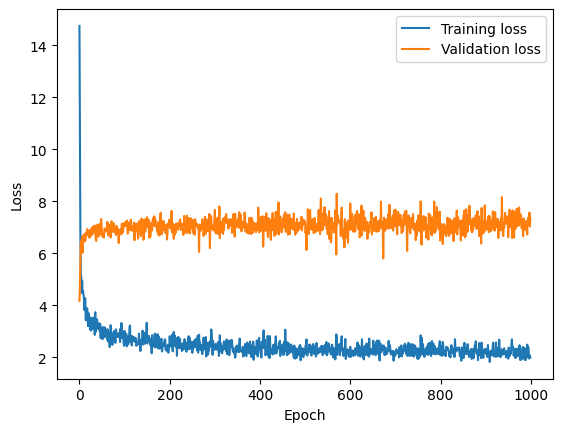

In [67]:
# training loop with validation and graph plotting
# map for storing the loss values
losses = {"train": [], "validation": []}
def training_loop(model: LinearRegressionModel, loss_function: torch.nn.MSELoss, optimizer, train_loader, val_loader, epochs):
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        val_loss = 0.0
        for x_train, y_train in train_loader:
            optimizer.zero_grad()
            y_pred = model(x_train)
            # Check for NaN in predictions
            if torch.isnan(y_pred).any():            
                raise ValueError('NaN detected in model predictions')
            
            compare_y_train = y_train.view_as(y_pred)
            loss = loss_function(y_pred, compare_y_train)            
            # Check for NaN in loss
            if torch.isnan(loss):
                raise ValueError('NaN detected in loss calculation')
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        model.eval()
        with torch.no_grad():
            val_loss_curr = sum(loss_function(model(x_val), y_val) for x_val, y_val in val_loader)
            val_loss += val_loss_curr.item()
        
        losses["train"].append(train_loss)
        losses["validation"].append(val_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Training loss: {loss}, Validation loss: {val_loss}")

training_loop(model, loss_function, optimizer, train_loader, val_loader, epochs)

# plot the loss values
plt.plot(losses["train"], label="Training loss")
plt.plot(losses["validation"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [71]:
# test the model
def test_model(model: LinearRegressionModel, loss_function: torch.nn.MSELoss, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for x_test, y_test in test_loader:
            y_pred = model(x_test)
            test_loss += loss_function(y_pred, y_test).item()
            denormalized_y_pred = denormalize_data(y_pred, y_test_tensor_before_norm)
            denormalized_y_test = denormalize_data(y_test, y_test_tensor_before_norm)
            denormalized_y_pred = denormalized_y_pred.view_as(denormalized_y_test)
            # print(torch.abs(denormalized_y_pred - denormalized_y_test) < (0.1 * denormalized_y_test))
            # calculate the accuracy i.e if the predicted value is within 10% of the actual value
            print(denormalized_y_pred.shape,"==",denormalized_y_test.shape)
            
            correct += torch.sum(torch.abs(denormalized_y_pred - denormalized_y_test) < (0.1 * denormalized_y_test)).item()
            print(correct," ",y_test.shape," ",y_test.size(0))
            total += y_test.size(0)
            
    print(f"Test loss: {test_loss}")
    print(f"Accuracy: {(correct / total) * 100.0} %")

test_model(model, loss_function, test_loader)

torch.Size([64]) == torch.Size([64])
31   torch.Size([64])   64
torch.Size([64]) == torch.Size([64])
75   torch.Size([64])   64
torch.Size([64]) == torch.Size([64])
116   torch.Size([64])   64
torch.Size([64]) == torch.Size([64])
159   torch.Size([64])   64
torch.Size([36]) == torch.Size([36])
174   torch.Size([36])   36
Test loss: 11.43184745311737
Accuracy: 59.589041095890416 %
